# callbacks.general_sched

Creates a scheduler that lets you train a model with following different `TrainingPhase`.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.general_sched import * 
from fastai import *
from fastai.docs import *

In [ ]:
show_doc(TrainingPhase, doc_string=False)

## <a id=TrainingPhase></a>`class` `TrainingPhase`
> `TrainingPhase`(`length`:`int`, `lrs`:`Floats`, `moms`:`Floats`, `lr_anneal`:`AnnealFunc`=`None`, `mom_anneal`:`AnnealFunc`=`None`)
<a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/callbacks/general_sched.py#L8">[source]</a>

Create a phase for training a model during `length` iterations, following a schedule given by `lrs` and `lr_anneal`, `moms` and `mom_anneal`. More specifically, the phase will make the learning rate (or momentum) vary from the first value of `lrs` (or `moms`) to the second, following `lr_anneal` (or `mom_anneal`). If an annealing function is speficied but `lrs` or `moms` is a float, it will decay to 0. If no annealing function is specified, the default is a linear annealing if `lrs` (or `moms`) is a tuple, a constant parameter if it's a float. 

In [ ]:
show_doc(GeneralScheduler)

## <a id=GeneralScheduler></a>`class` `GeneralScheduler`
> `GeneralScheduler`(`learn`:[`Learner`](/basic_train.html#Learner), `phases`:`Collection`\[[`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase)\]) :: [`Callback`](/callback.html#Callback)


Schedule multiple [`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase) for a [`Learner`](/basic_train.html#Learner). <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/callbacks/general_sched.py#L21">[source]</a>

In [ ]:
show_doc(GeneralScheduler.on_batch_end, doc_string=False)

#### <a id=on_batch_end></a>`on_batch_end`
> `on_batch_end`(`kwargs`:`Any`)
<a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/callbacks/general_sched.py#L34">[source]</a>

Takes a step in the current phase and prepare the hyperparameters for the next batch.

In [ ]:
show_doc(GeneralScheduler.on_train_begin, doc_string=False)

#### <a id=on_train_begin></a>`on_train_begin`
> `on_train_begin`(`n_epochs`:`int`, `kwargs`:`Any`)
<a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/callbacks/general_sched.py#L26">[source]</a>

Initiates the hyperparameters to the start values of the first phase. 

Let's make an example by using this to code [SGD with warm restarts](https://arxiv.org/abs/1608.03983).

In [ ]:
def fit_sgd_warm(learn, n_cycles, lr, mom, cycle_len, cycle_mult):
    n = len(learn.data.train_dl)
    phases = [TrainingPhase(n * (cycle_len * cycle_mult**i), lr, mom, lr_anneal=annealing_cos) for i in range(n_cycles)]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    if cycle_mult != 1:
        total_epochs = int(cycle_len * (1 - (cycle_mult)**n_cycles)/(1-cycle_mult)) 
    else: total_epochs = n_cycles * cycle_len
    learn.fit(total_epochs)

In [ ]:
data = get_mnist()
learn = ConvLearner(data, tvm.resnet18)
fit_sgd_warm(learn, 3, 1e-3, 0.9, 1, 3)

Total time: 01:42
epoch  train loss  valid loss
0      0.094893    0.058317    (00:07)
1      0.047180    0.029215    (00:07)
2      0.029441    0.023446    (00:07)
3      0.019201    0.023217    (00:07)
4      0.022522    0.015142    (00:07)
5      0.015581    0.012590    (00:07)
6      0.013525    0.012216    (00:07)
7      0.009146    0.014814    (00:07)
8      0.004855    0.013819    (00:07)
9      0.004536    0.012664    (00:07)
10     0.003782    0.011067    (00:08)
11     0.004073    0.015901    (00:07)
12     0.001894    0.011048    (00:07)



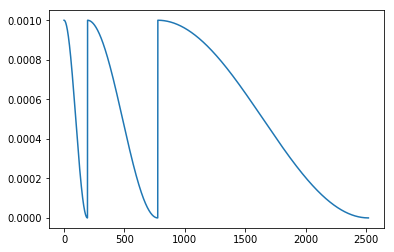

In [ ]:
learn.recorder.plot_lr()

## Undocumented Methods - Methods moved below this line will intentionally be hidden